## Étape 1 : Chargement et Préparation des Données

On commence par charger les données et analyser leur structure.

In [33]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [34]:
# Chargement du fichier CSV
df = pd.read_csv('data/Portmap.csv')

print("Aperçu des données :")
print(df.head())
print(f"\nDimensions du dataset : {df.shape}")

C:\Users\lerou\AppData\Local\Temp\ipykernel_28684\4049458388.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Portmap.csv')


Aperçu des données :
   Unnamed: 0                                 Flow ID       Source IP  \
0          24          192.168.50.254-224.0.0.5-0-0-0  192.168.50.254   
1          26          192.168.50.253-224.0.0.5-0-0-0  192.168.50.253   
2      176563  172.217.10.98-192.168.50.6-443-54799-6    192.168.50.6   
3       50762    172.217.7.2-192.168.50.6-443-54800-6    192.168.50.6   
4       87149  172.217.10.98-192.168.50.6-443-54801-6    192.168.50.6   

    Source Port  Destination IP   Destination Port   Protocol  \
0             0       224.0.0.5                  0          0   
1             0       224.0.0.5                  0          0   
2         54799   172.217.10.98                443          6   
3         54800     172.217.7.2                443          6   
4         54801   172.217.10.98                443          6   

                    Timestamp   Flow Duration   Total Fwd Packets  ...  \
0  2018-11-03 09:18:16.964447       114456999                  45  ...   
1

### Analyse des données

In [35]:
# Affichage des colonnes disponibles
print("Colonnes disponibles dans le dataset :")
print(df.columns.tolist())
print("\n" + "="*50)

# Affichage des types de données
print("\nTypes de données :")
print(df.dtypes)
print("\n" + "="*50)

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())
print("\n" + "="*50)

# Distribution des labels (on cherche la colonne qui contient les labels)
# Elle peut s'appeler 'Label', 'label', 'class', 'target', etc.
label_col = None
for col in df.columns:
    if 'label' in col.lower() or 'class' in col.lower():
        label_col = col
        break

if label_col:
    print(f"\nDistribution des labels (colonne '{label_col}') :")
    print(df[label_col].value_counts())
else:
    print("\nAttention : Aucune colonne 'Label' trouvée. Affichage de toutes les colonnes :")
    print(df.columns.tolist())


Colonnes disponibles dans le dataset :
['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Lengt

### Nettoyage des données

**Important :** Les modèles Scikit-Learn ne peuvent pas traiter directement du texte. On doit donc supprimer les colonnes non numériques qui ne sont pas utiles pour la classification (comme les IPs, les timestamps, les identifiants de flux).

In [36]:
# Détection automatique de la colonne de labels
label_col = None
for col in df.columns:
    if 'label' in col.lower() or 'class' in col.lower():
        label_col = col
        break

if label_col is None:
    print("Erreur : Aucune colonne 'Label' ou 'Class' trouvée!")
    print("Colonnes disponibles :", df.columns.tolist())
    # On prend la dernière colonne par défaut (souvent le target)
    label_col = df.columns[-1]
    print(f"Utilisation de la dernière colonne comme label : '{label_col}'")
else:
    print(f"Colonne de labels détectée : '{label_col}'")

# Création d'une copie pour le nettoyage
df_clean = df.copy()

# Identification et suppression de TOUTES les colonnes non-numériques (sauf le label)
colonnes_non_numeriques = []
for col in df_clean.columns:
    if col != label_col and df_clean[col].dtype == 'object':
        colonnes_non_numeriques.append(col)

print(f"\nColonnes non-numériques détectées : {colonnes_non_numeriques}")

# Suppression des colonnes non-numériques
if colonnes_non_numeriques:
    df_clean = df_clean.drop(columns=colonnes_non_numeriques)
    print(f"Colonnes supprimées : {colonnes_non_numeriques}")
else:
    print("Aucune colonne non-numérique à supprimer.")

print(f"\nNombre de colonnes restantes : {df_clean.shape[1]}")
print(f"Colonnes restantes : {df_clean.columns.tolist()}")


Colonne de labels détectée : ' Label'

Colonnes non-numériques détectées : ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP']
Colonnes supprimées : ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP']

Nombre de colonnes restantes : 83
Colonnes restantes : ['Unnamed: 0', ' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PS

In [37]:
# Encodage de la variable cible (utilisation de label_col définie précédemment)
label_encoder = LabelEncoder()
df_clean['Label_Encoded'] = label_encoder.fit_transform(df_clean[label_col])

print(f"Encodage de la colonne '{label_col}' :")
print("Correspondance des labels :")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Suppression de la colonne Label originale
df_clean = df_clean.drop(columns=[label_col])
print(f"\nColonne '{label_col}' supprimée après encodage.")


Encodage de la colonne ' Label' :
Correspondance des labels :
BENIGN -> 0
Portmap -> 1

Colonne ' Label' supprimée après encodage.


### Gestion des valeurs manquantes et des outliers

In [48]:
# Remplacement des valeurs infinies par NaN
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# Vérification des NaN après remplacement
nb_nan = df_clean.isnull().sum().sum()
print(f"Nombre total de valeurs NaN : {nb_nan}")

if nb_nan > 0:
    # Option 1 : Remplacement par la moyenne (pour les colonnes numériques)
    for col in df_clean.columns:
        if df_clean[col].dtype in ['float64', 'int64'] and col != 'Label_Encoded':
            df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
    
    print("Valeurs manquantes remplacées par la moyenne.")
else:
    print("Aucune valeur manquante à traiter.")

print(f"\nDimensions finales après nettoyage : {df_clean.shape}")

Nombre total de valeurs NaN : 0
Aucune valeur manquante à traiter.

Dimensions finales après nettoyage : (191694, 83)


### Standardisation des données

La standardisation permet de mettre toutes les variables numériques à la même échelle. C'est important pour éviter que certaines features avec de grandes valeurs dominent le modèle.

In [39]:
# Séparation des features (X) et de la cible (y)
X = df_clean.drop(columns=['Label_Encoded'])
y = df_clean['Label_Encoded']

print(f"Nombre de features : {X.shape[1]}")
print(f"Nombre d'exemples : {X.shape[0]}")
print(f"\nDistribution des classes : ")
print(y.value_counts())

Nombre de features : 82
Nombre d'exemples : 191694

Distribution des classes : 
Label_Encoded
1    186960
0      4734
Name: count, dtype: int64


In [40]:
# Vérification : suppression des colonnes non-numériques restantes dans X
colonnes_object = X.select_dtypes(include=['object']).columns.tolist()
if colonnes_object:
    print(f"⚠️ Attention : Colonnes non-numériques détectées dans X : {colonnes_object}")
    print(f"Ces colonnes vont être supprimées automatiquement.")
    X = X.drop(columns=colonnes_object)
    print(f"Colonnes restantes : {X.shape[1]}\n")

# Standardisation avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Données standardisées (aperçu) :")
print(X_scaled.head())
print(f"\nMoyenne après standardisation : {X_scaled.mean().mean():.4f}")
print(f"Écart-type après standardisation : {X_scaled.std().mean():.4f}")


Données standardisées (aperçu) :
   Unnamed: 0   Source Port   Destination Port   Protocol   Flow Duration  \
0   -1.731608     -0.243755          -1.664266 -11.312133       19.155352   
1   -1.731572     -0.243755          -1.664266 -11.312133       19.136972   
2    1.458628      6.153047          -1.641335  -7.272065        6.058541   
3   -0.814722      6.153163          -1.641335  -7.272065        6.058412   
4   -0.157172      6.153280          -1.641335  -7.272065        6.058398   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0            0.912801                -0.005259                    -0.688099   
1            1.147783                -0.005259                    -0.688099   
2            0.079683                 0.022310                    -0.518525   
3            0.079683                 0.022310                    -0.518525   
4            0.079683                 0.022310                    -0.518525   

    Total Length of Bwd Packe

## Étape 2 : Construction du Modèle

On divise les données en ensemble d'entraînement (80%) et de test (20%), puis on entraîne un arbre de décision.

In [41]:
# Division des données (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} exemples")

Taille de l'ensemble d'entraînement : 153355 exemples
Taille de l'ensemble de test : 38339 exemples


In [42]:
# Création et entraînement de l'arbre de décision
# On limite la profondeur pour que l'arbre reste lisible
dt_model = DecisionTreeClassifier(
    max_depth=4,           # Profondeur limitée pour la visualisation
    random_state=42,
    min_samples_split=50,  # Évite l'overfitting
    min_samples_leaf=20
)

print("Entraînement du modèle...")
dt_model.fit(X_train, y_train)
print("Modèle entraîné !")

Entraînement du modèle...
Modèle entraîné !


## Étape 3 : Évaluation et Visualisation

On va maintenant évaluer les performances du modèle et visualiser l'arbre de décision.

In [43]:
# Prédictions sur l'ensemble de test
y_pred = dt_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy du modèle : 0.9995 (99.95%)


### Matrice de confusion

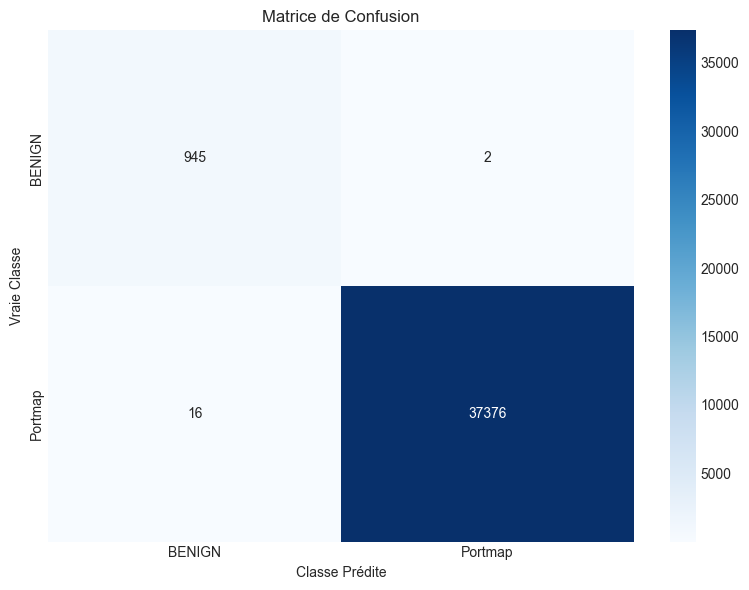


Matrice de confusion :
[[  945     2]
 [   16 37376]]


In [44]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.tight_layout()
plt.show()

print("\nMatrice de confusion :")
print(cm)

### Rapport de classification

In [45]:
# Affichage du rapport de classification détaillé
print("Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Rapport de classification :
              precision    recall  f1-score   support

      BENIGN       0.98      1.00      0.99       947
     Portmap       1.00      1.00      1.00     37392

    accuracy                           1.00     38339
   macro avg       0.99      1.00      1.00     38339
weighted avg       1.00      1.00      1.00     38339



### Visualisation de l'arbre de décision

Cette visualisation permet de comprendre comment l'arbre prend ses décisions.

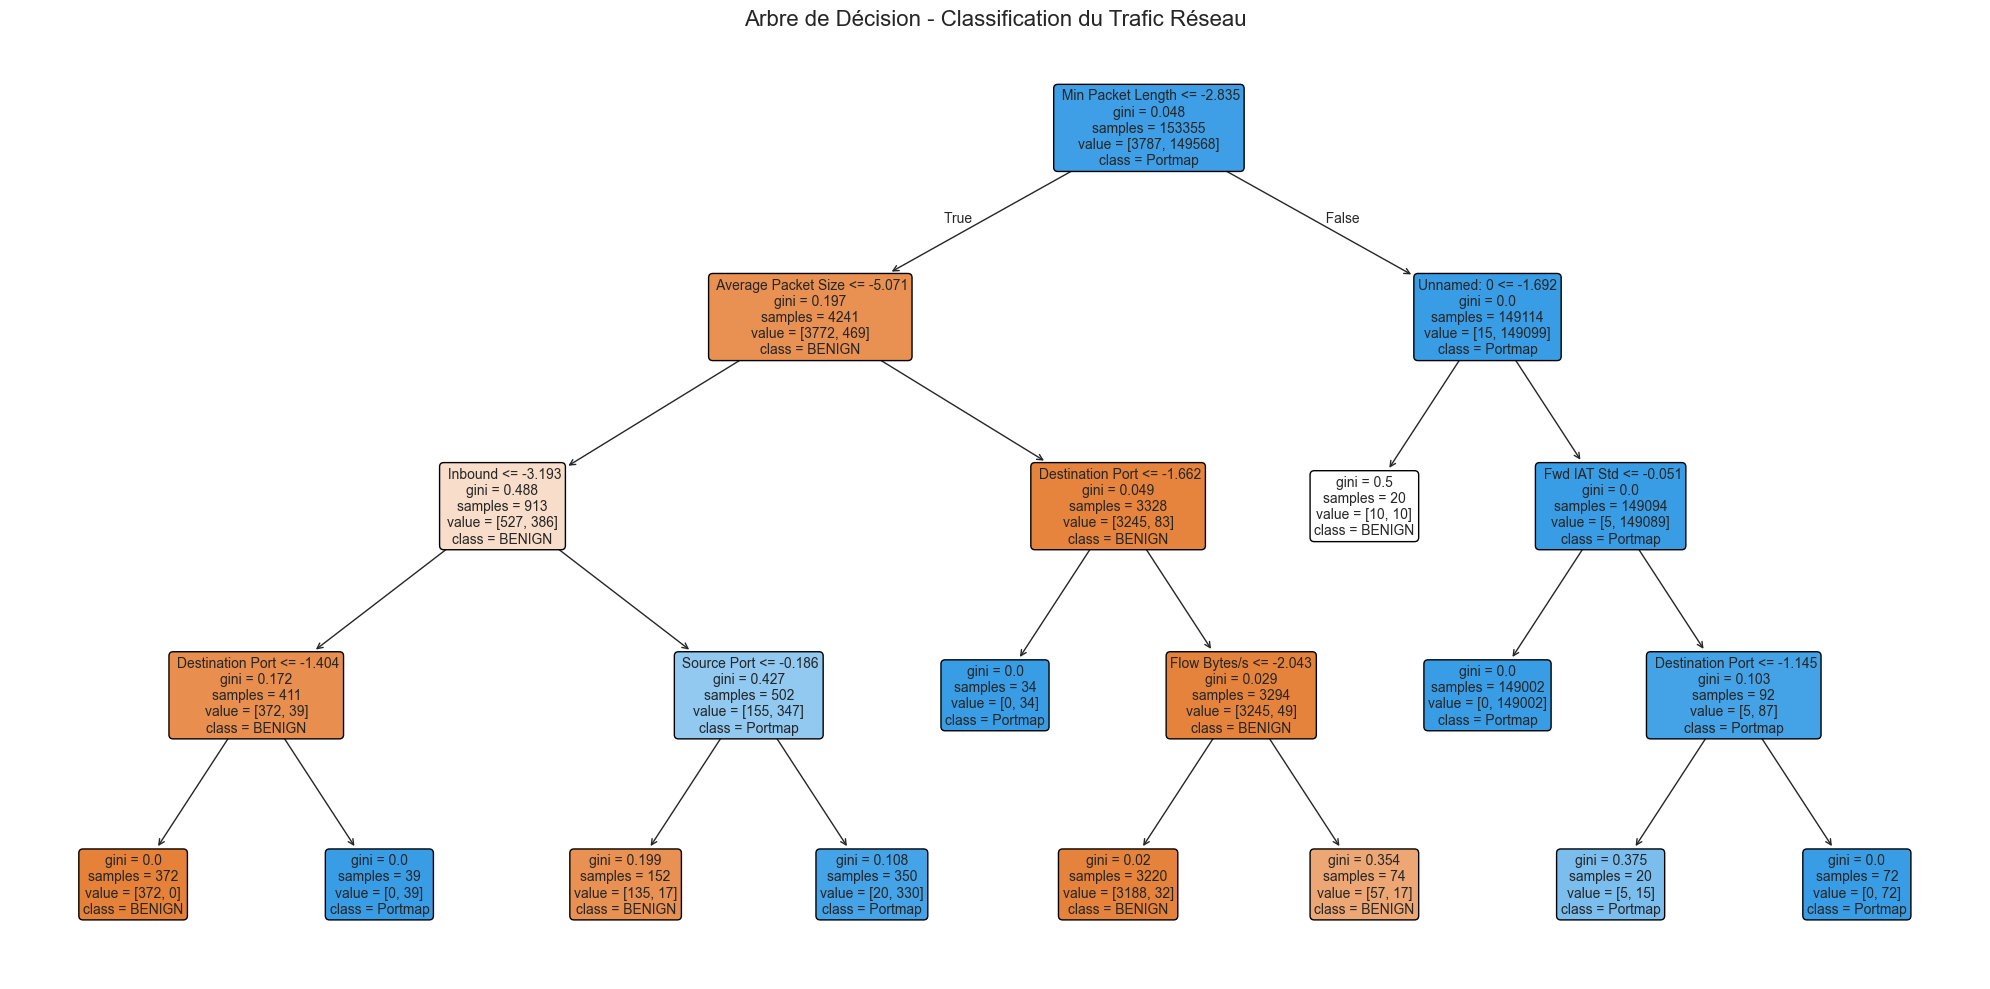

In [46]:
# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=X.columns, 
    class_names=label_encoder.classes_,
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title('Arbre de Décision - Classification du Trafic Réseau', fontsize=16)
plt.tight_layout()
plt.show()

### Interprétation d'une règle de l'arbre

En regardant l'arbre ci-dessus, on peut identifier des règles simples. Par exemple :

**Exemple de règle :** Si la durée du flux (Flow Duration) est très courte et que le nombre de paquets est faible, l'arbre peut classifier le trafic comme une attaque de type Portmap. 

Ce type de règle est facile à comprendre et à expliquer, contrairement à d'autres modèles plus complexes (comme les réseaux de neurones). C'est l'un des grands avantages des arbres de décision : ils sont **interprétables**.

### Importance des features

Top 10 des features les plus importantes :
                 Feature  Importance
41     Min Packet Length    0.904423
55   Average Packet Size    0.031447
81               Inbound    0.022287
1            Source Port    0.020296
2       Destination Port    0.019117
0             Unnamed: 0    0.001386
17          Flow Bytes/s    0.000969
25           Fwd IAT Std    0.000075
48        RST Flag Count    0.000000
49        PSH Flag Count    0.000000


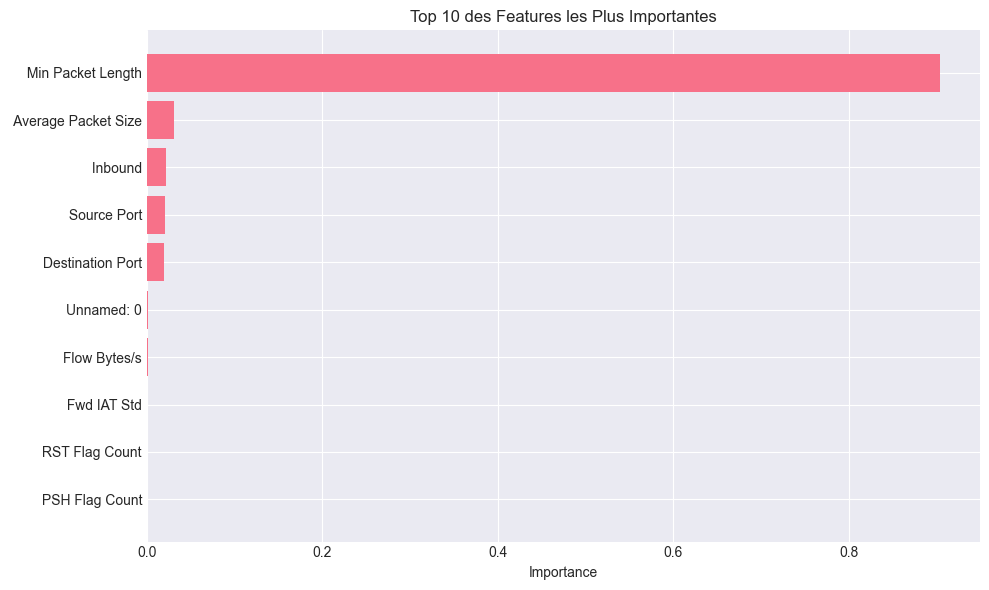

In [47]:
# Calcul de l'importance des features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 des features les plus importantes :")
print(feature_importance.head(10))

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['Feature'], feature_importance.head(10)['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 des Features les Plus Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Étape 4 : Synthèse et Réponses aux Questions

Cette section répond aux questions théoriques du TP.

### Question 1 : Pourquoi est-il important de bien préparer les données avant de modéliser ?

**Réponse :**

La préparation des données est cruciale car les algorithmes de machine learning ne peuvent pas traiter directement des données brutes. Voici pourquoi :

- **Valeurs manquantes :** Si on laisse des NaN ou des valeurs infinies, le modèle va planter ou donner des résultats incohérents. Il faut donc les remplacer (par la moyenne, la médiane) ou supprimer les lignes concernées.

- **Format des données :** Les algorithmes comme Scikit-Learn travaillent uniquement avec des nombres. Les colonnes texte (IPs, timestamps) doivent être supprimées si elles ne sont pas utiles, ou encodées si elles le sont (comme on l'a fait pour le Label).

- **Échelle des variables :** Si une feature varie entre 0 et 1 et une autre entre 0 et 10000, le modèle risque de donner trop d'importance à la seconde. La standardisation (StandardScaler) règle ce problème en mettant toutes les variables à la même échelle.

En résumé : des données mal préparées = des résultats médiocres, voire inutilisables.

### Question 2 : Quels sont les avantages et limites d'un arbre de décision comparé à KNN ?

**Réponse :**

**Avantages de l'arbre de décision :**
- **Interprétabilité :** On peut visualiser l'arbre et comprendre exactement comment il prend ses décisions. C'est utile pour expliquer les résultats à quelqu'un qui n'est pas expert en ML.
- **Pas besoin de standardisation :** Les arbres ne sont pas sensibles à l'échelle des données (contrairement à KNN).
- **Gère bien les données mixtes :** On peut mélanger des variables numériques et catégorielles.
- **Rapide en prédiction :** Une fois entraîné, il suffit de suivre les branches de l'arbre.

**Limites :**
- **Risque d'overfitting :** Si on ne limite pas la profondeur, l'arbre peut "apprendre par cœur" les données d'entraînement et mal généraliser.
- **Instabilité :** Un petit changement dans les données peut complètement modifier l'arbre.

**Comparaison avec KNN :**
- KNN est plus lent en prédiction (il doit calculer la distance à tous les points) mais peut être plus précis sur certains datasets.
- KNN nécessite une standardisation des données, ce qui n'est pas le cas de l'arbre.
- L'arbre est beaucoup plus facile à interpréter que KNN.

### Question 3 : Comment l'agrégation de modèles améliore-t-elle la performance ?

**Réponse :**

L'agrégation de modèles (ou **ensemble learning**) consiste à combiner plusieurs modèles pour obtenir de meilleures prédictions. Le principe est simple : plutôt que de faire confiance à un seul modèle, on demande l'avis de plusieurs et on fait un "vote".

**Exemple : La Forêt Aléatoire (Random Forest)**
- On entraîne plusieurs arbres de décision sur des sous-ensembles différents des données.
- Chaque arbre fait une prédiction.
- La prédiction finale est obtenue par vote majoritaire (classification) ou moyenne (régression).

**Pourquoi ça marche mieux ?**
- **Réduction de la variance :** Un seul arbre peut faire des erreurs à cause de sa sensibilité aux données. En moyenne, plusieurs arbres se compensent et réduisent l'erreur globale.
- **Robustesse :** Même si un arbre se trompe, les autres peuvent corriger.
- **Moins d'overfitting :** L'agrégation "lisse" les prédictions et évite de trop coller aux données d'entraînement.

En résumé : l'union fait la force ! Plusieurs modèles moyens ensemble font souvent mieux qu'un seul modèle parfait.